In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [38]:
# pip install matplotlib
# !pip install scipy
# !pip install statsmodels

1. Load the data in a software of your choice (python).

In [9]:
df = pd.read_csv("data_income_consumption_gender.csv")
df.head(3)
# Income, Consumption, Male(1)/ Female (0)

,Income,Consumption,Gender
0,112501.0,93432.64388,0
1,550001.0,524903.74890,1
2,253001.0,167628.65380,0


In [ ]:
# The task is to estimate the marginal propensity for consumption (model: cons ~ mpc*income + beta*control variables +error).

2. Create a table with summary statistics for the three variables.

In [14]:
df.describe()

,Income,Consumption,Gender
count,9.610000e+02,9.610000e+02,961.000000
mean,2.575565e+05,2.401659e+05,0.529657
std,1.846497e+05,1.425792e+05,0.499380
min,1.890100e+04,0.000000e+00,0.000000
25%,1.470010e+05,1.488651e+05,0.000000
50%,2.050010e+05,2.262722e+05,1.000000
75%,3.087010e+05,3.085111e+05,1.000000
max,1.641001e+06,1.141876e+06,1.000000


3. Plot an empirical histogram of income. 
Ensure that the histogram is normalized properly so that the area under the curve in integrated to 1.

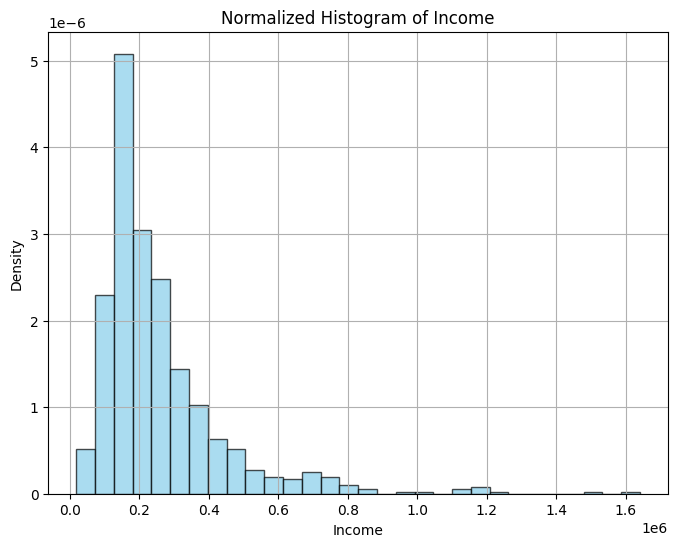

In [26]:
# Plot a normalized histogram
plt.figure(figsize=(8, 6))
plt.hist(df['Income'], bins=30, density=True, alpha=0.7, color='skyblue', edgecolor='black')

# Add labels and title
plt.xlabel('Income')
plt.ylabel('Density')
plt.title('Normalized Histogram of Income')
plt.grid(True)

4. Using maximum likelihood (or any other method), fit a Lognormal distribution and
a Gamma distribution to the empirical probability density function of income. Plot
both distributions on top of the raw data. Discuss which one has better fit and
describe based on which metric you would choose the best fit distribution.

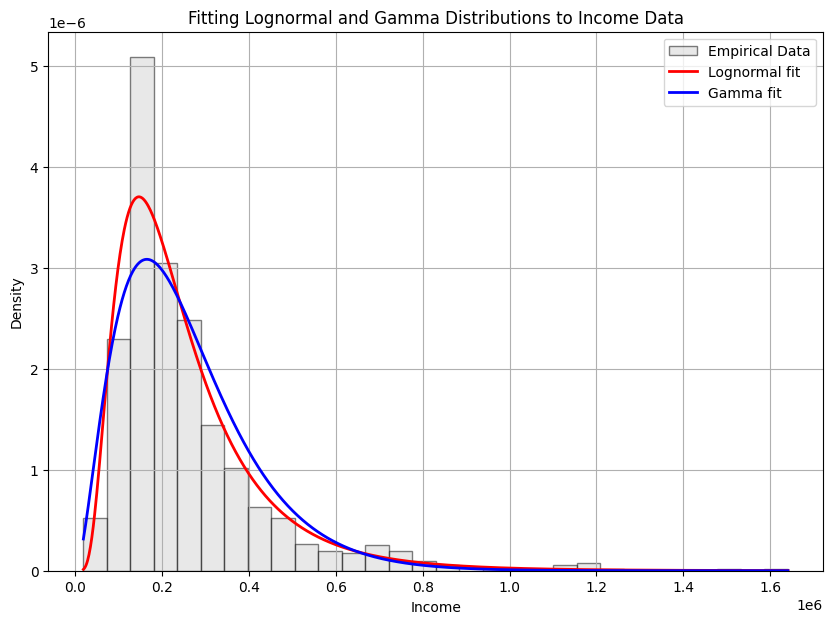

In [33]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

# Step 1: Plot normalized histogram
plt.figure(figsize=(10, 7))
count, bins, ignored = plt.hist(df['Income'], bins=30, density=True, alpha=0.5, color='lightgrey', edgecolor='black', label='Empirical Data')

# Step 2: Fit Lognormal distribution
shape_lognorm, loc_lognorm, scale_lognorm = stats.lognorm.fit(df['Income'], floc=0)  # fixing loc=0 is common

# Step 3: Fit Gamma distribution
alpha_gamma, loc_gamma, scale_gamma = stats.gamma.fit(df['Income'], floc=0)

# Step 4: Plot the fitted PDFs
x = np.linspace(df['Income'].min(), df['Income'].max(), 1000)

# Lognormal PDF
pdf_lognorm = stats.lognorm.pdf(x, shape_lognorm, loc_lognorm, scale_lognorm)
plt.plot(x, pdf_lognorm, 'r-', lw=2, label='Lognormal fit')

# Gamma PDF
pdf_gamma = stats.gamma.pdf(x, alpha_gamma, loc_gamma, scale_gamma)
plt.plot(x, pdf_gamma, 'b-', lw=2, label='Gamma fit')

# Step 5: Finalize plot
plt.xlabel('Income')
plt.ylabel('Density')
plt.title('Fitting Lognormal and Gamma Distributions to Income Data')
plt.legend()
plt.grid(True)
plt.show()


Now, How to Decide Which Fit is Better?
We use goodness-of-fit metrics:

Log-Likelihood: Higher is better.

AIC (Akaike Information Criterion): Lower is better.

BIC (Bayesian Information Criterion): Lower is better.

##### Let's compute them

In [34]:
# Log-likelihoods
loglik_lognorm = np.sum(stats.lognorm.logpdf(df['Income'], shape_lognorm, loc_lognorm, scale_lognorm))
loglik_gamma = np.sum(stats.gamma.logpdf(df['Income'], alpha_gamma, loc_gamma, scale_gamma))

# Number of parameters
k_lognorm = 2  # shape and scale (loc fixed to 0)
k_gamma = 2    # alpha and scale (loc fixed to 0)

# AIC
AIC_lognorm = 2 * k_lognorm - 2 * loglik_lognorm
AIC_gamma = 2 * k_gamma - 2 * loglik_gamma

# BIC
n = len(df['Income'])
BIC_lognorm = np.log(n) * k_lognorm - 2 * loglik_lognorm
BIC_gamma = np.log(n) * k_gamma - 2 * loglik_gamma

print(f"Lognormal: Log-Likelihood={loglik_lognorm:.2f}, AIC={AIC_lognorm:.2f}, BIC={BIC_lognorm:.2f}")
print(f"Gamma: Log-Likelihood={loglik_gamma:.2f}, AIC={AIC_gamma:.2f}, BIC={BIC_gamma:.2f}")


Lognormal: Log-Likelihood=-12678.31, AIC=25360.62, BIC=25370.35
Gamma: Log-Likelihood=-12719.18, AIC=25442.35, BIC=25452.09


- AIC and BIC are lower for Lognormal, it fits better.
- Also it is visible in the plotted histogram that Lognormal hugs the original plot more better than the Gamma.

6. Estimating MPC: Regress consumption on income and the gender dummy as a control variable. 


In [39]:
import statsmodels.api as sm

# Define X and y
X = df[['Income', 'Gender']]  # make sure gender_dummy is already 0/1
X = sm.add_constant(X)  # Adds intercept term
y = df['Consumption']

# Fit the OLS model
model = sm.OLS(y, X).fit()

# Print the summary
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:            Consumption   R-squared:                       0.592
Model:                            OLS   Adj. R-squared:                  0.591
Method:                 Least Squares   F-statistic:                     694.3
Date:                Sun, 11 May 2025   Prob (F-statistic):          4.36e-187
Time:                        12:31:32   Log-Likelihood:                -12337.
No. Observations:                 961   AIC:                         2.468e+04
Df Residuals:                     958   BIC:                         2.470e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       8.473e+04   5866.294     14.444      0.0

#### we can see that the coefficients are:- 
- const (intercept): 8.473e+04, p-value = 0.000
- Income (MPC):   0.5934, p-value = 0.000

Clearly the p-values are lesser than 0.05 (our chosen significant level); hence the values of intercept and MPC are significant.

MPC = 0.5934 →
For every ₹1/$1 increase in income, consumption increases by ₹0.5934, controlling for gender.

gender_dummy = 4912.5943 →
Male-headed households consume ₹4912.5943 more (on average), controlling for income.

6. Discuss the magnitude of estimated MPC in view of the relevant literature (you may search online and provide at most three important references from international journals). Discuss the precision of the estimates.